# ADSP TEAM 1 PROJECT DEMO

### Importing necessary packages

In [6]:
import rasterio as rio
from rasterio.plot import show
import torch
import segmentation_models_pytorch as smp
from Utils import presentation_utils as pu
import numpy as np
import random
from glob import glob
from termcolor import colored
import os

### Removing previos run tmp items

In [7]:
! rm tmp/predictions/*
! rm tmp/tiles/*
! rm tmp/example.tif

rm: cannot remove 'tmp/predictions/*': No such file or directory
rm: cannot remove 'tmp/tiles/*': No such file or directory
rm: cannot remove 'tmp/example.tif': No such file or directory


### Setting seeds for reproducibility

In [8]:
random.seed(51996)
np.random.seed(51996)
torch.manual_seed(51996)

### Definition of necessary informations circa models and relative position of inference activations

In [9]:
MODELS = {
    "vanilla":12,
    "ben":12,
    "imagenet":10,
    "effis":12
}
IMAGES = {
    "img_0" : ["tmp/test_img.tiff", "tmp/test_mask.tiff"],
    "img_1" : ["tmp/test_img_1.tiff", "tmp/test_mask_1.tiff"]
}

### Main loop in which trained models infer over test images

Tiling test image...


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


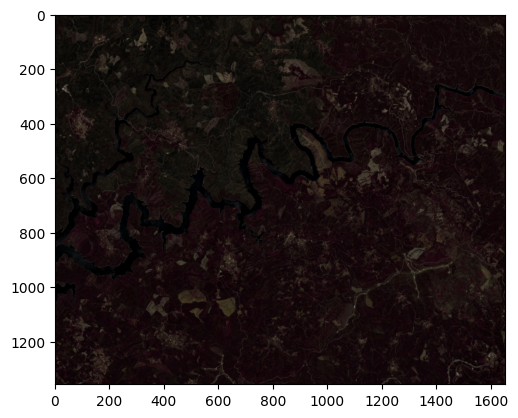

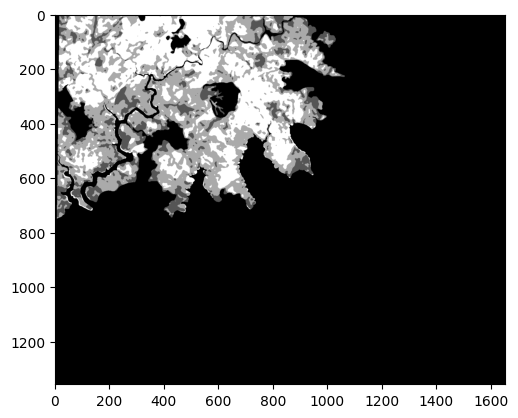

Loading initial image into memory...
Test image shape: (13, 1357, 1653)
Computing tiles...
Testing model: vanilla; input channels: 12
Making prediction...


100%|██████████| 12/12 [00:02<00:00,  5.30it/s]
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Assembling final prediction...
Empty canvas shape:  (1, 1357, 1653)


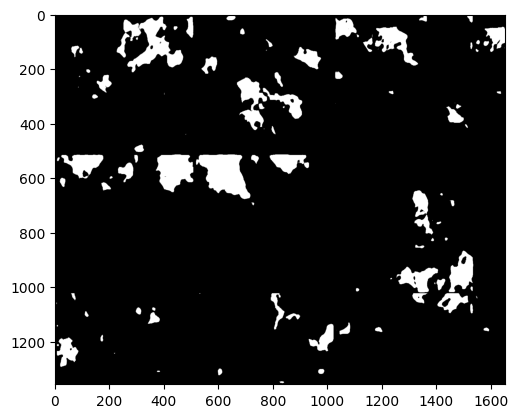

Removing existing predictions...
Testing model: ben; input channels: 12
Making prediction...


100%|██████████| 12/12 [00:02<00:00,  5.26it/s]
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Assembling final prediction...
Empty canvas shape:  (1, 1357, 1653)


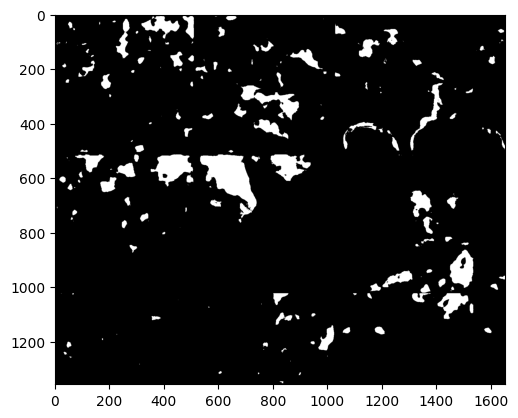

Removing existing predictions...
Testing model: imagenet; input channels: 10
Making prediction...


100%|██████████| 12/12 [00:02<00:00,  5.28it/s]
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Assembling final prediction...
Empty canvas shape:  (1, 1357, 1653)


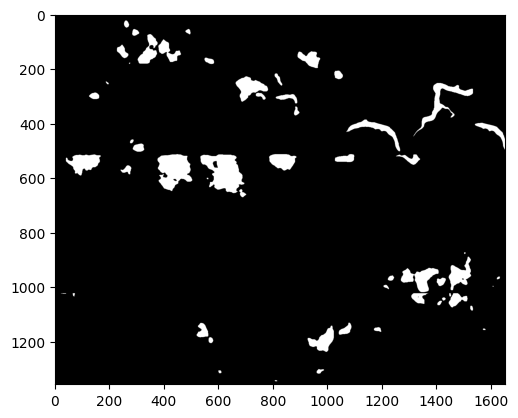

Removing existing predictions...
Testing model: effis; input channels: 12
Making prediction...


100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Assembling final prediction...
Empty canvas shape:  (1, 1357, 1653)


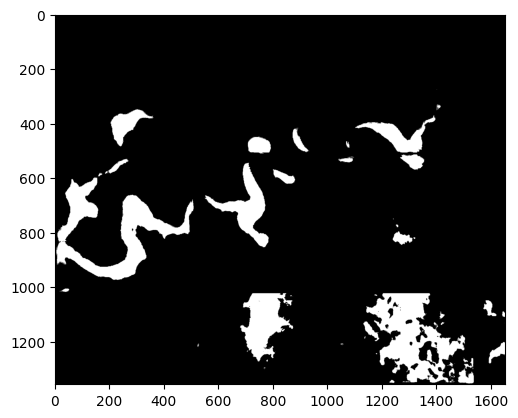

Removing existing predictions...
Tiling test image...


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


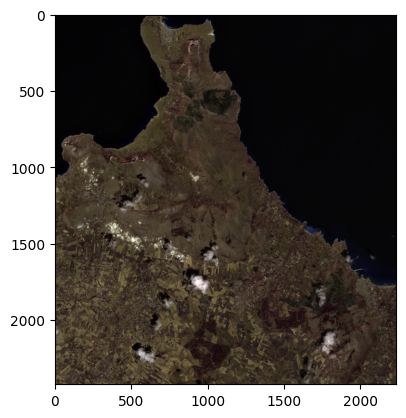

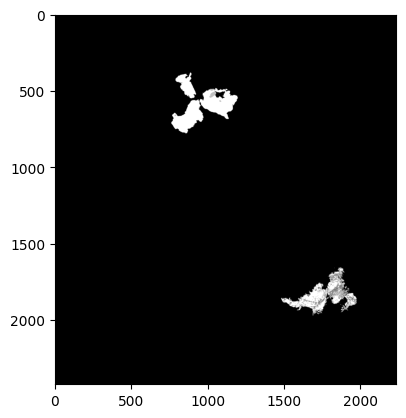

Loading initial image into memory...
Test image shape: (13, 2422, 2236)
Computing tiles...
Testing model: vanilla; input channels: 12
Making prediction...


100%|██████████| 25/25 [00:05<00:00,  4.92it/s]
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Assembling final prediction...
Empty canvas shape:  (1, 2422, 2236)


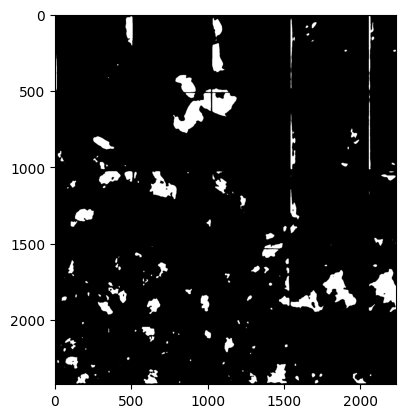

Removing existing predictions...
Testing model: ben; input channels: 12
Making prediction...


100%|██████████| 25/25 [00:05<00:00,  4.98it/s]
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Assembling final prediction...
Empty canvas shape:  (1, 2422, 2236)


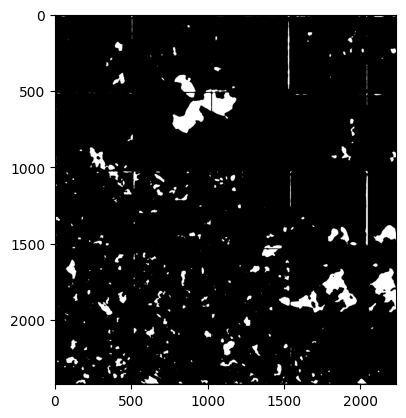

Removing existing predictions...
Testing model: imagenet; input channels: 10
Making prediction...


100%|██████████| 25/25 [00:04<00:00,  5.03it/s]
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Assembling final prediction...
Empty canvas shape:  (1, 2422, 2236)


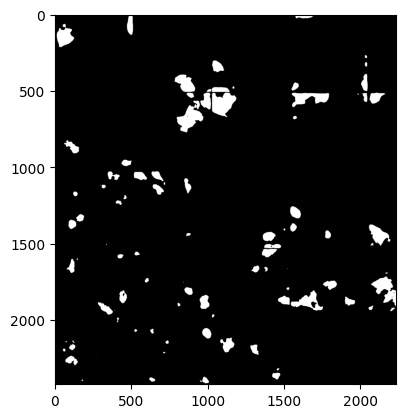

Removing existing predictions...
Testing model: effis; input channels: 12
Making prediction...


100%|██████████| 25/25 [00:04<00:00,  5.10it/s]
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Assembling final prediction...
Empty canvas shape:  (1, 2422, 2236)


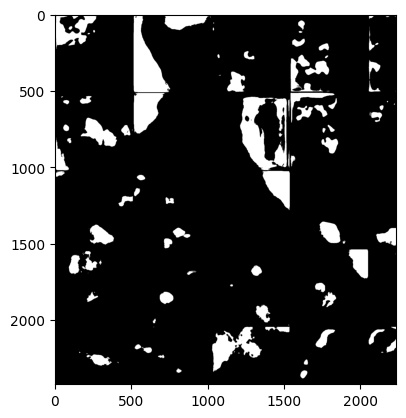

Removing existing predictions...


In [10]:
label_counter = 1
for image, mask in IMAGES.values(): # iterating through images
    # save and tile each image
    print("Tiling test image...")
    initial_img = rio.open(image, "r").read()
    initial_img = initial_img[[4, 3, 2], :, :]
    show(initial_img)
    gt_mask = rio.open(mask, "r").read()
    show(gt_mask, cmap="gray")
    pu.tiling(initial_img_path=image)
    for mdl, in_c in MODELS.items(): # iterating through trained models
        print(colored(f"Testing model: {mdl}; input channels: {in_c}", "red")) # logging informations
        # definition of backbone model
        model = smp.Unet(encoder_name="resnet50", encoder_weights=None, in_channels=in_c, classes=1)
        model.load_state_dict(torch.load(f"models/trained_models/{mdl}.pth"), strict=False)
        print("Making prediction...")
        pu.make_predictions(model=model, model_type=mdl) # performing prediction
        print("Assembling final prediction...")
        final_prediction, shape_crop = pu.merge_tiles(test_img_path=image) # merging predicted patches
        show(final_prediction[:, :, 512:shape_crop+512],  cmap="gray")
        pu.write_results(final_img = final_prediction, label=f"{label_counter}_{mdl}") 
        print(colored(f"Removing existing predictions...", "green"))
        for prediction in glob("tmp/predictions/*.tif"):
            os.remove(prediction)
    for tile in glob("tmp/tiles/*.tif"):
        os.remove(tile)
    label_counter += 1